In [5]:
import datetime
import pandas 
import dateutil.parser as parser
def dateparse (time_in_secs): 
        _time=datetime.datetime.fromtimestamp(float(time_in_secs))
        return _time.strftime('%Y-%m-%d')
    
data = pandas.read_csv('E:/IU/Sem4/Network Science/Project/facebook-links.csv',parse_dates=[2], date_parser=dateparse)

In [6]:
data['year'] = data['timestamp'].dt.year
data['month'] = data['timestamp'].dt.month
#new_data=data[(data['year'] == 2008)]
#new_data.to_csv('E:/IU/Sem4/Network Science/Project/facebook-links.csv', sep='\t', encoding='utf-8')

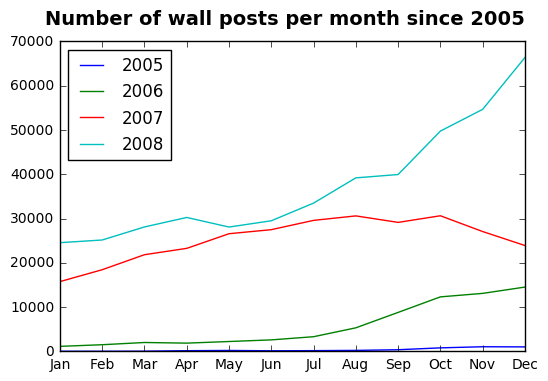

In [248]:
# Now lets plot it
%matplotlib inline
import matplotlib.pyplot as plt
ticks=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
plt.figure().suptitle('Number of wall posts per month since 2005', fontsize=14, fontweight='bold')
#plt.set_xlabel('months')
_year=[2005,2006,2007,2008]
for num in range(len(_year)):
    new_data=data[(data['year'] == _year[num])].groupby(['month']).size().reset_index(name="count")
    plt.plot([i for i in range(len(ticks))], [new_data['count'][val] for val in new_data.index])
    plt.xticks([i for i in range(len(ticks))],ticks)
plt.legend(_year, loc='upper left')
#plt.plot([i for i in range(len(ticks))], [new_data1['count'][val] for val in new_data1.index])


In [238]:
#Find out popular user who has more incoming wall interactions
import collections

from collections import Counter
new_data=data[data['year']==2008]
Month_array=[1,2,3,4,5,6,7,8,9,10,11,12]
popular_month_array=[i for i in range(1,13)]
influential_pplbyYr=[]
popular_pplbyYr=[]
popular_usrId=[]
influential_users=[]
c = collections.Counter()
for i in range(len(Month_array)):
    _temp_data=data[data['month']==Month_array[i]]
    if len(_temp_data)>0:
        _usrId=sorted(_temp_data.groupby(['source']).size().to_dict(),reverse=True)[:1]
        popular_usrId=sorted(_temp_data.groupby(['Target']).size().to_dict(),reverse=True)[:1]
        Month_array[i]="Usr Id:\n"+str(_usrId[0])
        popular_month_array[i]="Usr Id:\n"+str(popular_usrId[0])
        influential_pplbyYr.append(max(collections.Counter(_temp_data.groupby(['source']).size())))
        popular_pplbyYr.append(max(collections.Counter(_temp_data.groupby(['Target']).size())))
        


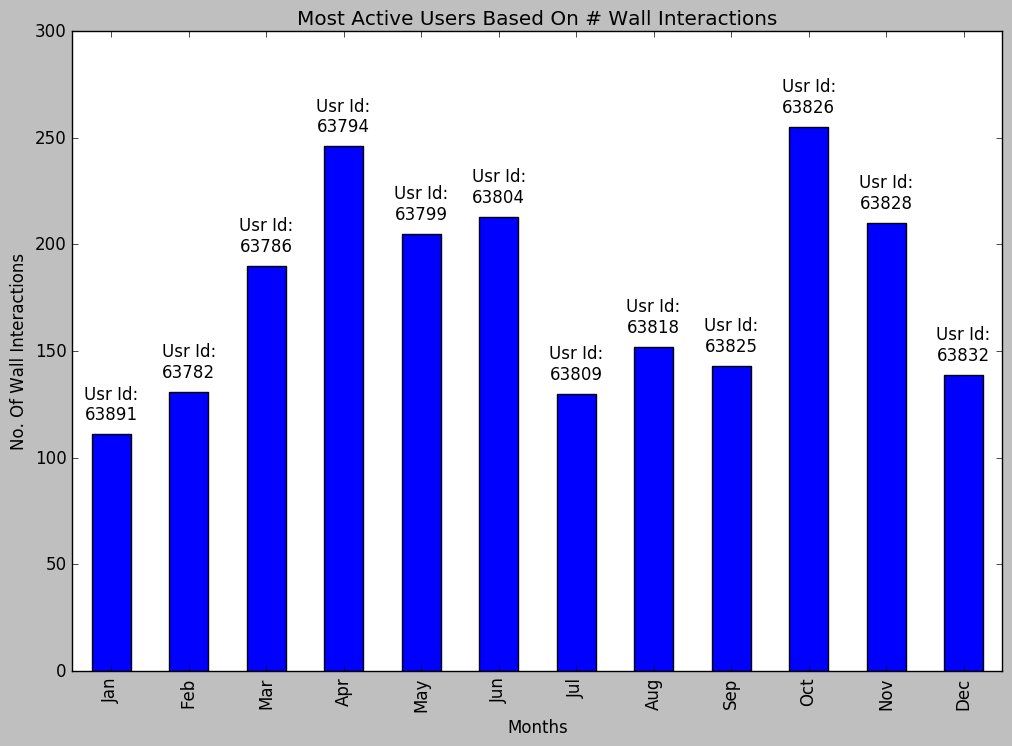

In [249]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

freq_series = pd.Series.from_array(influential_pplbyYr) 
# now to plot the figure...
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_title("Most Active Users Based On # Wall Interactions")
ax.set_xlabel("Months")
ax.set_ylabel("No. Of Wall Interactions")
ax.set_xticklabels(ticks)
rects = ax.patches

# Now make some labels
labels = [Month_array[i] for i in range(len(rects))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

 

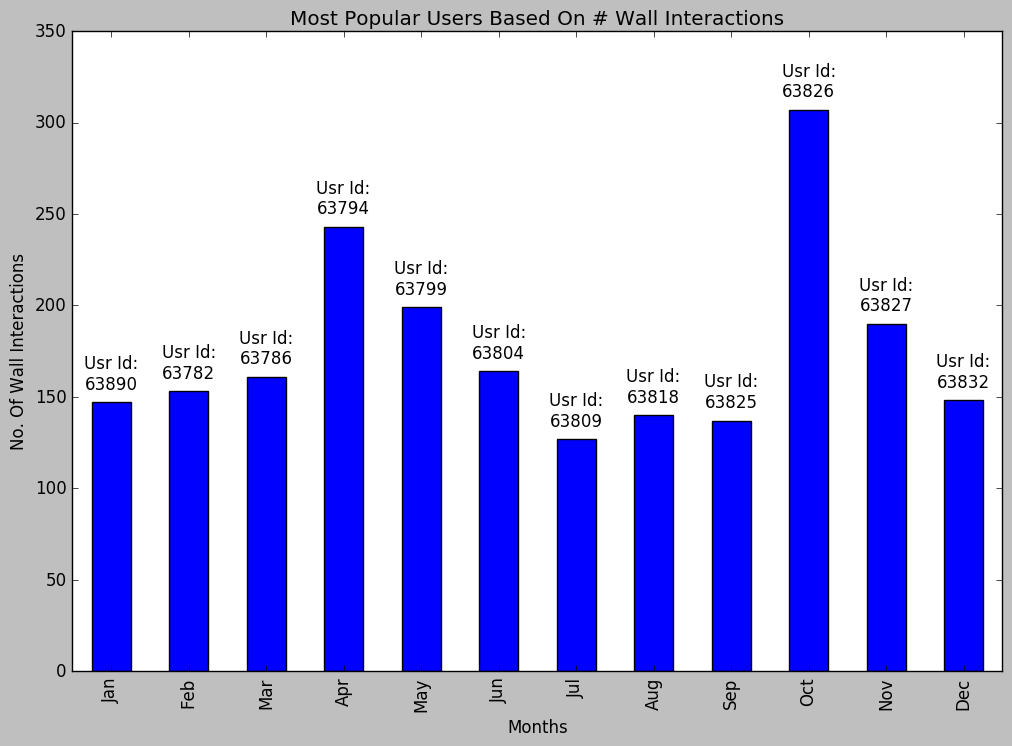

In [241]:
freq_series = pd.Series.from_array(popular_pplbyYr) 
# now to plot the figure...
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_title("Most Popular Users Based On # Wall Interactions")
ax.set_xlabel("Months")
ax.set_ylabel("No. Of Wall Interactions")
ax.set_xticklabels(ticks)
rects = ax.patches

# Now make some labels
labels = [popular_month_array[i] for i in range(len(rects))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')


In [145]:
#Spike of number of wall posts since 2008
_filtered_data_of_yrs=data.groupby(['year']).size().reset_index(name='count')
Year_arr=[]
for val in _filtered_data_of_yrs.index:
    Year_arr.append(_filtered_data_of_yrs['year'][val])
    #print(_filtered_data_of_yrs['year'][val])
print([i for i in range(len(Year_arr))])

[0, 1, 2, 3, 4, 5, 6, 7]


([<matplotlib.axis.XTick at 0x20bdb46dc50>,
 <a list of 8 Text xticklabel objects>)

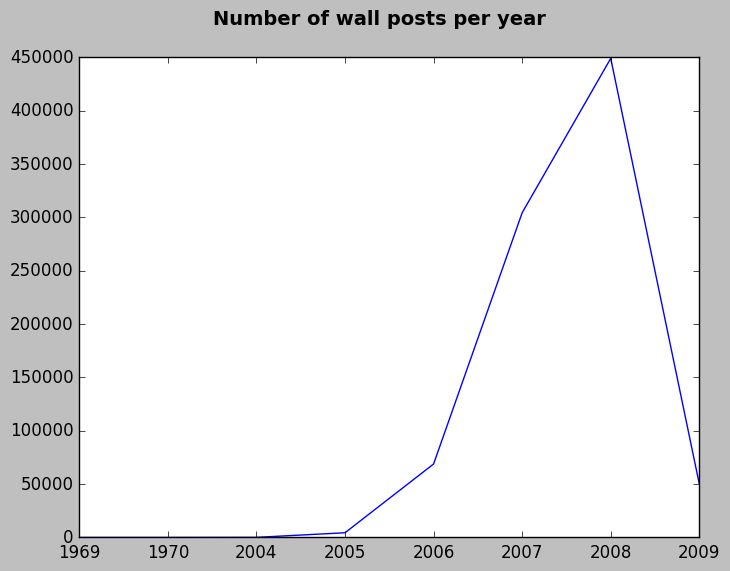

In [243]:
plt.figure().suptitle('Number of wall posts per year', fontsize=14, fontweight='bold')
plt.plot([i for i in range(len(Year_arr))], [_filtered_data_of_yrs['count'][val] for val in _filtered_data_of_yrs.index])
plt.xticks([i for i in range(len(Year_arr))], Year_arr)